In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import subprocess

### Settings

In [71]:
#stuff to play with
lmod = "0" #linkage model : 0 = LM, 1 = LT, 2 LF

#(almost) set in stone
algo = "./uhv_gomea" #which executable to use
pro = "35" #problem index
rnd = "1234" #random seed
wrp = "./"

# to keep in line with the others
ssize = "15" #solution set size
low = "-100" #lower init bound
upp = "100" #upper init bound
pop = "100" #population size
ela = "1000" #elitist archive size target
eva = "1000000" #maximum number of MO evaluations
sec = "360" #time limit
K = 10

#not used
vtr = "123" #value to reach (unsure if we should use or not)
dim = str(3 * K) #number of parameters

### Run algorithm (duurt ffkes)

In [75]:
#command = np.array(["./uhv_gomea", "-s", "-e", " -v", "1", "35", "3" "15", "-5",
#       "5", "100", "1000", "1000000", "60", "120.7876", "1234",  "./"])
  
command = np.array([algo, "-s", "-e", "-v", lmod, pro, dim, ssize, 
low, upp, pop, ela, eva, sec, vtr, rnd, wrp])    
subprocess.run(command, capture_output=True)


CompletedProcess(args=array(['./uhv_gomea', '-s', '-e', '-v', '0', '35', '30', '15', '-100',
       '100', '100', '1000', '1000000', '360', '123', '1234', './'],
      dtype='<U11'), returncode=0, stdout=b'Problem settings:\n\tfunction_name = RadReg\n\tproblem_index = 35\n\tmo_number_of_parameters = 30\n\tinit_range = [-100, 100]\n\tHV reference point = 200, 200\nRun settings:\n\tmax_number_of_MO_evaluations = 1000000\n\tmaximum_number_of_seconds = 360\n\tuse_vtr = 0\n\tvtr = 123\nArchive settings:\n\tCollect all MO-sol in archive = yes\n\tElitist_archive_target_size = 1000\n\tApproximation_set_size = 1000\nOptimizer settings: \n\tSOHV\n\tlocal_optimizer_index = 64\n\ttest_points = 15\n\tnumber_of_reference_points = 15\n\tso_number_of_parameters = 450\n\tuse_finite_differences = no\n\tpopsize = 100\n\tenable_niching = no\n\trandom_seed = 1234\nRestart with a popsize of 100, located 1 niche(s).\n  Terminated core search algorithm because function evaluations limit reached\n  Of 1 elite 

### Process data and show plots

In [76]:
# path to statistics file
path1 = "".join("./statistics_UVHGOMEA_lmod" + lmod + "_problem" 
+ pro + "_p" + ssize + "_run" + rnd + ".dat")

#path to pareto front file
path2 = "".join("./best_final_UVHGOMEA_lmod" + lmod + "_problem" + pro
+ "_p" + ssize + "_run" + rnd + ".dat")

df = pd.read_csv(path1, delim_whitespace=True)
data = np.genfromtxt(path2, delimiter='')

#print(data)
df.head()


,Gen,Evals,Time,Best-f,Best-constr,Average-obj,Std-obj,Avg-constr,Std-constr,Best-HV,Best-IGD,Best-GD,size,Archive-HV,Archive-IGD,Archive-GD,size.1,MO-evals
0,0,100,0.02009,5.313542e+06,0.0,15280000.0,0.4404,0.0,0.0,0.0,0.0,0.0,4,0.0,0.0,0.0,11,1500
1,1,199,0.11450,4.205643e+06,0.0,6415000.0,0.1601,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,10,2985
2,2,315,0.18040,3.247215e+06,0.0,4194000.0,0.1800,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,0.0,4,4725
3,3,431,0.22830,2.138450e+06,0.0,2752000.0,0.2091,0.0,0.0,0.0,0.0,0.0,7,0.0,0.0,0.0,5,6465
4,4,547,0.27640,8.835310e+05,0.0,1896000.0,0.2021,0.0,0.0,0.0,0.0,0.0,3,0.0,0.0,0.0,11,8205


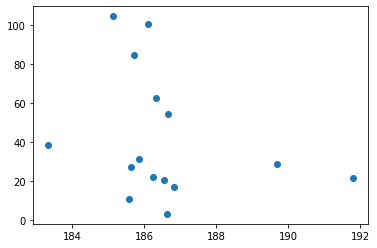

In [77]:
data_conc = np.zeros((len(data[:,0]),2))
data_conc[:,0] = data[:,0]
data_conc[:,1] = data[:,1]

#print(data_conc)

plt.plot(data_conc[:,0],data_conc[:,1],'o')
#plt.plot(data_conc[:,1],data_conc[:,0],'o')

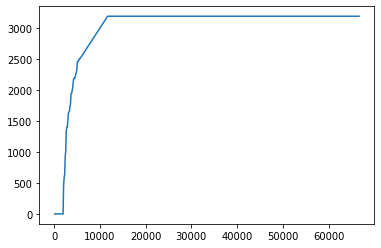

In [78]:
#plt.plot(df.Evals, -1*df['Best-f'])
plt.plot(df.Evals, df['Best-HV'])